In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import utility.io_utility as io
import utility.animation_utility as anim

In [2]:
def burning(path):
    result = io.read(path)
    return np.sum(result[:,:,:,1], axis = (1,2))

In [3]:
def burned(path):
    result = io.read(path)
    return np.sum(result[:,:,:,5], axis = (1,2))

In [4]:
def burningPlusBurned(path):
    result = io.read(path)
    tmp = result[:,:,:,1] * result[:,:,:,5]
    return burning(path) + burned(path) - np.sum(np.where(tmp == 1, 1, 0), axis = (1,2)) # Abziehen was brennt + schon gebrannt hat

In [5]:
def derivative(array):
    x = np.arange(array.size)
    y = array
    y_ = np.diff(y) / np.diff(x)
    x_ = (x[:-1] + x[1:]) / 2
    return y_

In [6]:
def burning_radius(path):
    return np.sqrt(burningPlusBurned(path)/np.pi)

In [7]:
def schwerpunkt(path):
    result = io.read(path)
    out = []
    t = 0
    while t < result[:,0,0,1].size:
        tmp = result[t,:,:,1] + result[t,:,:,5] - result[t,:,:,1] * result[t,:,:,5]
        (x, y) = np.where(tmp == 1)
        out.append(np.array([np.sum(x)/burningPlusBurned(path)[t], np.sum(y)/burningPlusBurned(path)[t]]))
        t = t+1
    return np.array(out), (x, y) # /burningPlusBurned(path)

In [8]:
def plot(array, name, color):
    y = array
    x = np.arange(y.size)
    plt.plot(x, y, color, label = "Model")
    plt.xlabel("Zeit [h]")
    plt.ylabel(name)
    #plt.legend()
    plt.grid()

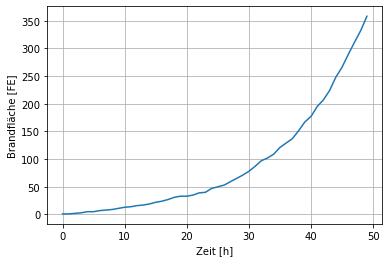

In [9]:
plot(burningPlusBurned("data/result_output_burned"), "Brandfläche [FE]", "C0")

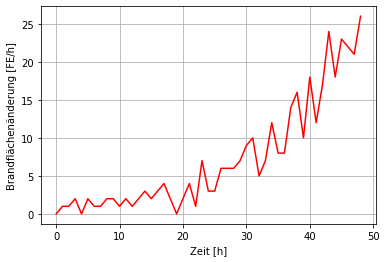

In [10]:
#plot(derivative(burning("data/result_output")), "Brandflächenänderung [FE/h]", "r")
plot(derivative(burningPlusBurned("data/result_output_burned")), "Brandflächenänderung [FE/h]", "r")

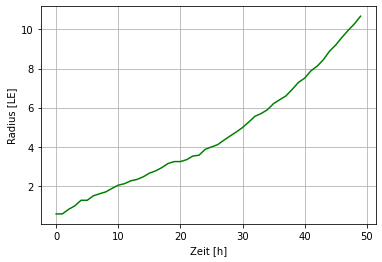

In [11]:
#plot(burning_radius("data/result_output"), "Radius [LE]", "green")
plot(burning_radius("data/result_output_burned"), "Radius [LE]", "green")

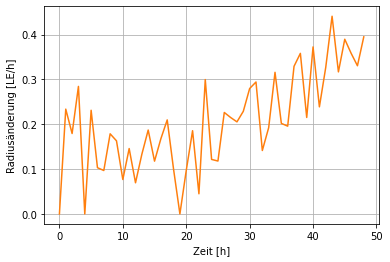

In [12]:
#plot(derivative(burning_radius("data/result_output")), "Radiusänderung [LE/h]", "C1")
plot(derivative(burning_radius("data/result_output_burned")), "Radiusänderung [LE/h]", "C1")

In [13]:
# anim.animate("data/result_output2")